##Installation


In [37]:

!pip install torch
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [38]:
#@title Import

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
#@title Define Hyperparameters

input_size = 784 # img_size = (28,28) ---> 28*28=784 in total
hidden_size = 500 # number of nodes at hidden layer
num_classes = 10 # number of output classes discrete range [0,9]
num_epochs = 20 # number of times which the entire dataset is passed throughout the model
batch_size = 100 # the size of input data took for one iteration
lr = 1e-3 # size of step
#@title Downloading MNIST data

train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor())
#@title Loading the data

train_gen = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = batch_size,
                                             shuffle = True)

test_gen = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size,
                                      shuffle = False)
#@title Define model class

class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out
#@title Build the model

net = Net(input_size, hidden_size, num_classes)
if torch.cuda.is_available():
  net.cuda()
#@title Define loss-function & optimizer

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( net.parameters(), lr=lr)

In [45]:
#@title Training the model

loss_list = []
acc_list = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_gen):
    images = Variable(images.view(-1, 28*28))
    labels = Variable(labels)
    if torch.cuda.is_available():
      images = images.cuda()
      labels = labels.cuda()

    optimizer.zero_grad()
    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
            %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.item()))

  loss_list.append(loss.item())

  correct = 0
  total = 0
  for images, labels in test_gen:
    images = Variable(images.view(-1, 28*28))
    if torch.cuda.is_available():
      images = images.cuda()
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()

  acc = 100 * correct / total
  acc_list.append(acc)
  print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Epoch [1/20], Step [100/600], Loss: 0.3465
Epoch [1/20], Step [200/600], Loss: 0.2978
Epoch [1/20], Step [300/600], Loss: 0.2774
Epoch [1/20], Step [400/600], Loss: 0.0978
Epoch [1/20], Step [500/600], Loss: 0.1224
Epoch [1/20], Step [600/600], Loss: 0.1830
Test Accuracy of the model on the 10000 test images: 95 %
Epoch [2/20], Step [100/600], Loss: 0.0368
Epoch [2/20], Step [200/600], Loss: 0.0792
Epoch [2/20], Step [300/600], Loss: 0.1260
Epoch [2/20], Step [400/600], Loss: 0.0984
Epoch [2/20], Step [500/600], Loss: 0.1357
Epoch [2/20], Step [600/600], Loss: 0.0260
Test Accuracy of the model on the 10000 test images: 96 %
Epoch [3/20], Step [100/600], Loss: 0.1194
Epoch [3/20], Step [200/600], Loss: 0.0513
Epoch [3/20], Step [300/600], Loss: 0.0970
Epoch [3/20], Step [400/600], Loss: 0.0289
Epoch [3/20], Step [500/600], Loss: 0.0212
Epoch [3/20], Step [600/600], Loss: 0.0655
Test Accuracy of the model on the 10000 test images: 97 %
Epoch [4/20], Step [100/600], Loss: 0.0738
Epoch [4/

Text(0.5, 1.0, 'Loss')

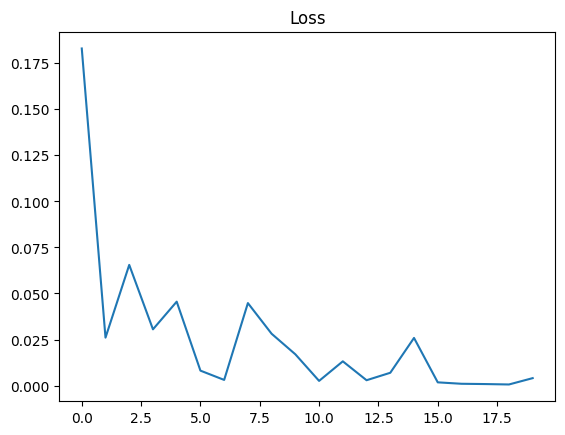

Text(0.5, 1.0, 'Accuracy')

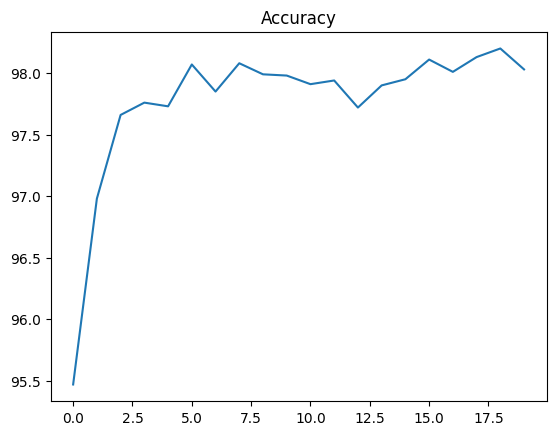

In [46]:
# Plot
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.title('Loss')
plt.show()

# Plot
import matplotlib.pyplot as plt
plt.plot(acc_list)
plt.title('Accuracy')
plt.show()


# Increase the network layer

In [47]:
hidden_size2 = 500 # number of nodes at new hidden layer

In [53]:

class Net(nn.Module):
  def __init__(self, input_size, hidden_size, hidden_size2, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, hidden_size2)
    self.relu = nn.ReLU()
    self.fc3 = nn.Linear(hidden_size2, num_classes)

  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    out = self.relu(out)
    out = self.fc3(out)
    return out

net = Net(input_size, hidden_size, hidden_size2, num_classes)
if torch.cuda.is_available():
  net.cuda()

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( net.parameters(), lr=lr)


loss_list = []
acc_list = []

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_gen):
    images = Variable(images.view(-1, 28*28))
    labels = Variable(labels)
    if torch.cuda.is_available():
      images = images.cuda()
      labels = labels.cuda()

    optimizer.zero_grad()
    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
            %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.item()))

  loss_list.append(loss.item())

  correct = 0
  total = 0
  for images, labels in test_gen:
    images = Variable(images.view(-1, 28*28))
    if torch.cuda.is_available():
      images = images.cuda()
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()

  acc = 100 * correct / total
  acc_list.append(acc)
  print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Net(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=10, bias=True)
)

Epoch [1/20], Step [100/600], Loss: 0.1269
Epoch [1/20], Step [200/600], Loss: 0.1385
Epoch [1/20], Step [300/600], Loss: 0.1245
Epoch [1/20], Step [400/600], Loss: 0.1809
Epoch [1/20], Step [500/600], Loss: 0.1495
Epoch [1/20], Step [600/600], Loss: 0.1928
Test Accuracy of the model on the 10000 test images: 96 %
Epoch [2/20], Step [100/600], Loss: 0.1421
Epoch [2/20], Step [200/600], Loss: 0.0686
Epoch [2/20], Step [300/600], Loss: 0.0298
Epoch [2/20], Step [400/600], Loss: 0.0567
Epoch [2/20], Step [500/600], Loss: 0.1096
Epoch [2/20], Step [600/600], Loss: 0.3240
Test Accuracy of the model on the 10000 test images: 97 %
Epoch [3/20], Step [100/600], Loss: 0.0508
Epoch [3/20], Step [200/600], Loss: 0.0737
Epoch [3/20], Step [300/600], Loss: 0.0317
Epoch [3/20], Step [400/600], Loss: 0.0507
Epoch [3/20], Step [500/600], Loss: 0.1078
Epoch [3/20], Step [600/600], Loss: 0.0393
Test Accuracy of the model on the 10000 test images: 97 %
Epoch [4/20], Step [100/600], Loss: 0.0595
Epoch [4/

Text(0.5, 1.0, 'Loss')

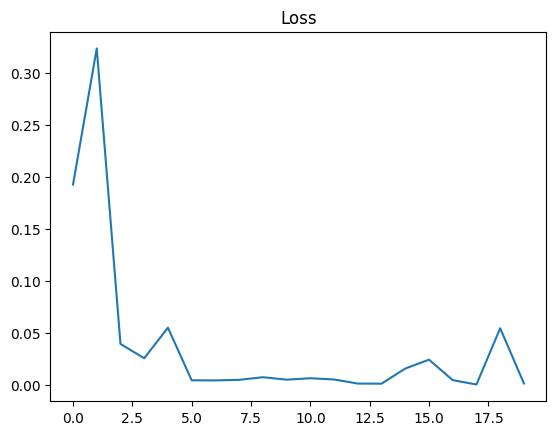

Text(0.5, 1.0, 'Accuracy')

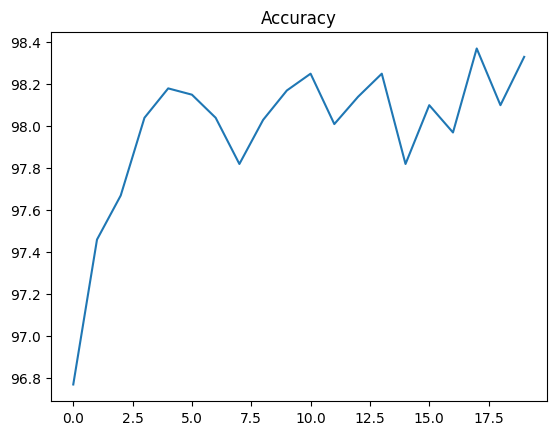

In [54]:
# Plot
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.title('Loss')
plt.show()


# Plot
import matplotlib.pyplot as plt
plt.plot(acc_list)
plt.title('Accuracy')
plt.show()

# Let’s have joint loss


In [52]:
# Data load

train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                        transform = transforms.ToTensor())

train_gen = torch.utils.data.DataLoader(dataset = train_data,
                                        batch_size = batch_size,
                                        shuffle = True)

test_gen = torch.utils.data.DataLoader(dataset = test_data,
                                        batch_size = batch_size,
                                        shuffle = False)

loss_function1 = nn.CrossEntropyLoss()
loss_function2 = nn.MSELoss()

optimizer = torch.optim.Adam( net.parameters(), lr=lr)

loss_list = []
acc_list = []

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_gen):
    images = Variable(images.view(-1, 28*28))
    labels = Variable(labels)
    labels_MSE = torch.eye(10)[labels]
    if torch.cuda.is_available():
      images = images.cuda()
      labels = labels.cuda()
      labels_MSE = labels_MSE.cuda()


    optimizer.zero_grad()
    outputs = net(images)
    loss1 = loss_function1(outputs, labels)
    loss2 = loss_function2(outputs, labels_MSE.float())
    loss = loss1 + loss2
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
            %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.item()))

  loss_list.append(loss.item())

  correct = 0
  total = 0
  for images, labels in test_gen:
    images = Variable(images.view(-1, 28*28))
    if torch.cuda.is_available():
      images = images.cuda()
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()

  acc = 100 * correct / total
  acc_list.append(acc)
  print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Epoch [1/20], Step [100/600], Loss: 0.9983
Epoch [1/20], Step [200/600], Loss: 0.9210
Epoch [1/20], Step [300/600], Loss: 0.9628
Epoch [1/20], Step [400/600], Loss: 0.8265
Epoch [1/20], Step [500/600], Loss: 0.8138
Epoch [1/20], Step [600/600], Loss: 0.8805
Test Accuracy of the model on the 10000 test images: 97 %
Epoch [2/20], Step [100/600], Loss: 0.7858
Epoch [2/20], Step [200/600], Loss: 0.7744
Epoch [2/20], Step [300/600], Loss: 0.7702
Epoch [2/20], Step [400/600], Loss: 0.8162
Epoch [2/20], Step [500/600], Loss: 0.7959
Epoch [2/20], Step [600/600], Loss: 0.7872
Test Accuracy of the model on the 10000 test images: 98 %
Epoch [3/20], Step [100/600], Loss: 0.7740
Epoch [3/20], Step [200/600], Loss: 0.7738
Epoch [3/20], Step [300/600], Loss: 0.8250
Epoch [3/20], Step [400/600], Loss: 0.7934
Epoch [3/20], Step [500/600], Loss: 0.7503
Epoch [3/20], Step [600/600], Loss: 0.7962
Test Accuracy of the model on the 10000 test images: 98 %
Epoch [4/20], Step [100/600], Loss: 0.7452
Epoch [4/

Text(0.5, 1.0, 'Loss')

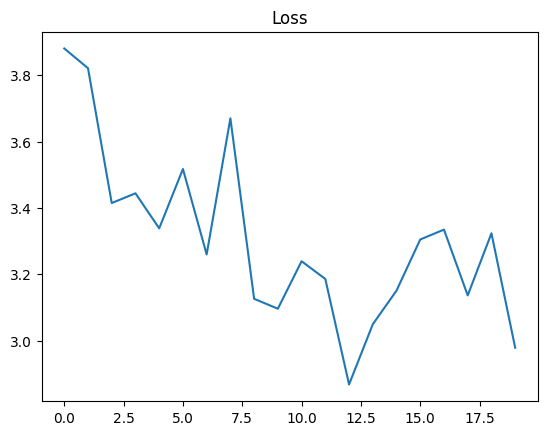

Text(0.5, 1.0, 'Accuracy')

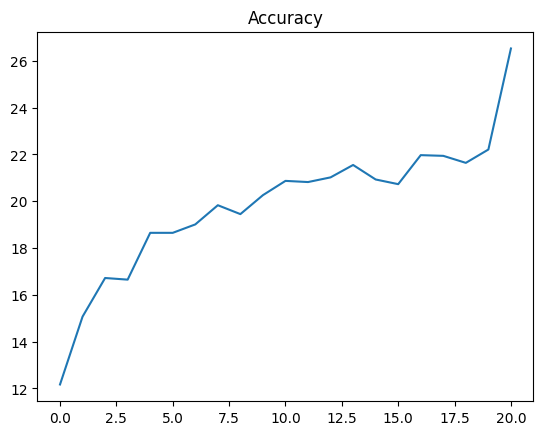

In [62]:
# Plot
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.title('Loss')
plt.show()

# Plot
import matplotlib.pyplot as plt
plt.plot(acc_list)
plt.title('Accuracy')
plt.show()


# Change to CIFAR100 & %?

In [55]:

# change dataset to CIFAR-100
train_data = dsets.CIFAR100(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.CIFAR100(root = './data', train = False,
                        transform = transforms.ToTensor())

train_gen = torch.utils.data.DataLoader(dataset = train_data,
                                              batch_size = batch_size,
                                              shuffle = True)

test_gen = torch.utils.data.DataLoader(dataset = test_data,
                                              batch_size = batch_size,
                                              shuffle = False)



Files already downloaded and verified


In [56]:

input_size = 3072 # img_size = (32,32,3) ---> 32*32*3=3072 in total
hidden_size = 500 # number of nodes at hidden layer
num_classes = 100 # number of output classes discrete range [0,99]
num_epochs = 20 # number of times which the entire dataset is passed throughout the model
batch_size = 100 # the size of input data took for one iteration
lr = 1e-3 # size of step


In [57]:

class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out



net = Net(input_size, hidden_size, num_classes)
if torch.cuda.is_available():
  net.cuda()

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( net.parameters(), lr=lr)

loss_list = []
acc_list = []

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_gen):
    images = Variable(images.view(-1, 32*32*3))
    labels = Variable(labels)
    if torch.cuda.is_available():
      images = images.cuda()
      labels = labels.cuda()

    optimizer.zero_grad()
    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
            %(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.item()))

  loss_list.append(loss.item())

  correct = 0
  total = 0
  for images, labels in test_gen:
    images = Variable(images.view(-1, 32*32*3))
    if torch.cuda.is_available():
      images = images.cuda()
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()

  acc = 100 * correct / total
  acc_list.append(acc)
  print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Net(
  (fc1): Linear(in_features=3072, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=100, bias=True)
)

Epoch [1/20], Step [100/500], Loss: 4.3260
Epoch [1/20], Step [200/500], Loss: 4.1013
Epoch [1/20], Step [300/500], Loss: 3.9331
Epoch [1/20], Step [400/500], Loss: 3.8402
Epoch [1/20], Step [500/500], Loss: 3.8807
Test Accuracy of the model on the 10000 test images: 12 %
Epoch [2/20], Step [100/500], Loss: 3.7930
Epoch [2/20], Step [200/500], Loss: 3.6698
Epoch [2/20], Step [300/500], Loss: 3.7170
Epoch [2/20], Step [400/500], Loss: 3.8376
Epoch [2/20], Step [500/500], Loss: 3.8212
Test Accuracy of the model on the 10000 test images: 15 %
Epoch [3/20], Step [100/500], Loss: 3.6772
Epoch [3/20], Step [200/500], Loss: 3.4615
Epoch [3/20], Step [300/500], Loss: 3.9398
Epoch [3/20], Step [400/500], Loss: 3.4711
Epoch [3/20], Step [500/500], Loss: 3.4149
Test Accuracy of the model on the 10000 test images: 16 %
Epoch [4/20], Step [100/500], Loss: 3.5649
Epoch [4/20], Step [200/500], Loss: 3.5729
Epoch [4/20], Step [300/500], Loss: 3.6474
Epoch [4/20], Step [400/500], Loss: 3.5607
Epoch [4/

Text(0.5, 1.0, 'Loss')

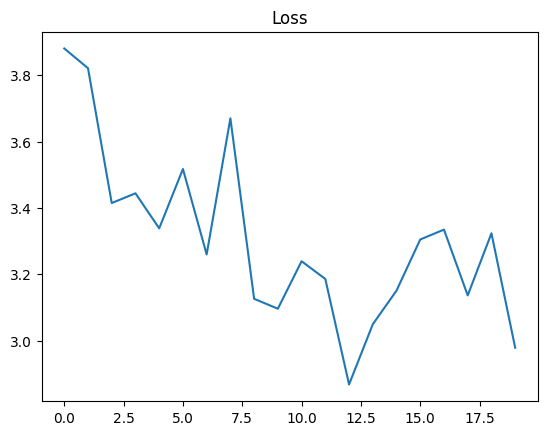

In [58]:
# Plot
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.title('Loss')
plt.show()



Text(0.5, 1.0, 'Accuracy')

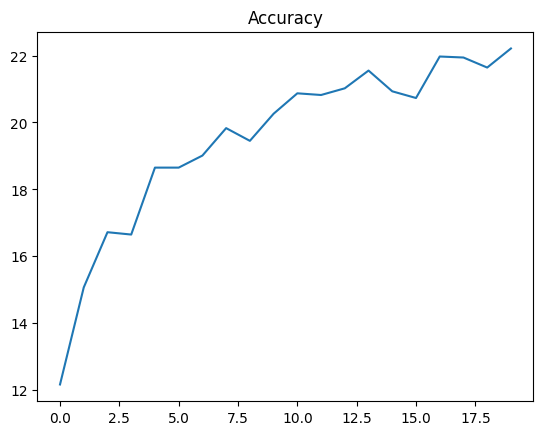

In [59]:
# Plot
import matplotlib.pyplot as plt
plt.plot(acc_list)
plt.title('Accuracy')
plt.show()


In [60]:
correct = 0
total = 0
for images, labels in train_gen:
  images = Variable(images.view(-1, 32*32*3))
  if torch.cuda.is_available():
    images = images.cuda()
  outputs = net(images)
  _, predicted = torch.max(outputs.data, 1)
  total += labels.size(0)
  correct += (predicted.cpu() == labels).sum()

acc = 100 * correct / total
acc_list.append(acc)
print('Train Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Train Accuracy of the model on the 10000 test images: 26 %


In [61]:
print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))
# print("Training accuracy: ", acc_list[-1])


Test Accuracy of the model on the 10000 test images: 26 %
